In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
meansFile = np.loadtxt("test_mean.txt")
hipFile = np.loadtxt("./mouse-data/hip1000.txt", delimiter = ',') # expression data
# hipNames = np.loadtxt("./mouse-data/hip1000names.txt")

meansFile.shape     # dimension (208, 3) 208 features, 3 clusters
hipFile.shape      # dimension (208, 879) 208 features, 879 genes 

meanFileTrans = meansFile.transpose()
hipFileTrans = hipFile.transpose()

features = meansFile.shape[0]    # 208
clusters = meansFile.shape[1]   # 3
genes = hipFile.shape[1]       # 879

# K-Means Clustering

(a). Run K-means algorithm with K = 3 with the initialization of K means given in ‘test mean.txt’. Plot the objective (y-axis) over iterations (x-axis). What is the objective value at convergence? (Make sure you use the given initialization. The initialization is given for the grading purpose.)

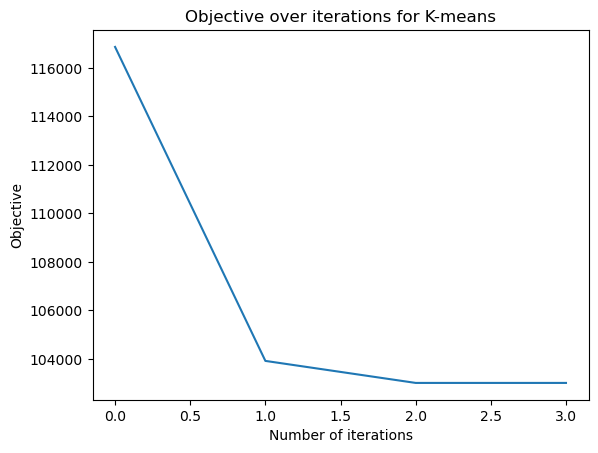

The objective value at convergence is 103010.60123401815


In [193]:
def distance(gene, centroid):
    distance = 0
    for i in range(len(gene)):
        distance += (gene[i]-centroid[i])**2
    distance = distance**0.5
    return distance

def generateClusters(centroids):
    geneClusters = []
    for gene in range(genes):
        clusterDistances = []
        for c in range(clusters):
            clusterDistances.append(distance(hipFileTrans[gene], centroids[c]))
        minCluster = np.argmin(clusterDistances)
        geneClusters.append(minCluster)
    return geneClusters

def updateMeans(generatedClusters):
    newMeans = []
    for cluster in range(clusters):
        genesForCluster = []
        for gene in range(len(generatedClusters)):
            if generatedClusters[gene] == cluster: 
                genesForCluster.append(gene)
        numOfGenes = len(genesForCluster)
        newAvg = []
        avg = 0
        for feature in range(features):
            for gene in genesForCluster:
                avg += hipFileTrans[gene][feature] 
            if numOfGenes == 0:
                avg = 0
            else: 
                avg = avg/numOfGenes
            newAvg.append(avg)   
        newMeans.append(newAvg)
    newMeans = np.array(newMeans)
    return newMeans

def determineObjective(centroids, generatedClusters):
    objective = 0   
    for cluster in range(clusters):
        for gene in range(len(generatedClusters)):
            if generatedClusters[gene] == cluster:
                objective += distance(centroids[cluster], hipFileTrans[gene])**2              
    return objective

def kMeans(centroids):
    l = [centroids]        
    objList = []
    for i in range(50):
        gClusters = generateClusters(l[-1])
        l.append(updateMeans(gClusters))
        obj = determineObjective(l[-1], gClusters)
        objList.append(obj)
        if np.array_equal(l[-1], l[-2]) == True:
            break
    return objList, gClusters


def plotting(objList):
    plt.plot(list(range(len(objList))), objList)
    plt.xlabel("Number of iterations")
    plt.ylabel("Objective")
    plt.title("Objective over iterations for K-means")
    plt.show()

objectiveList, finalGeneCluster = kMeans(meanFileTrans)
kMeans(meanFileTrans)
plotting(objectiveList)
print("The objective value at convergence is",objectiveList[-1])

(b) Run K-means algorithm with K = 3 with your own random initialization. Plot the correlation coefficient matrix of a) the raw data and b) the data after you group the columns of the expression matrix according to the clusters found by K-means. Plot these as an image of N × N correlation matrix for N genes.

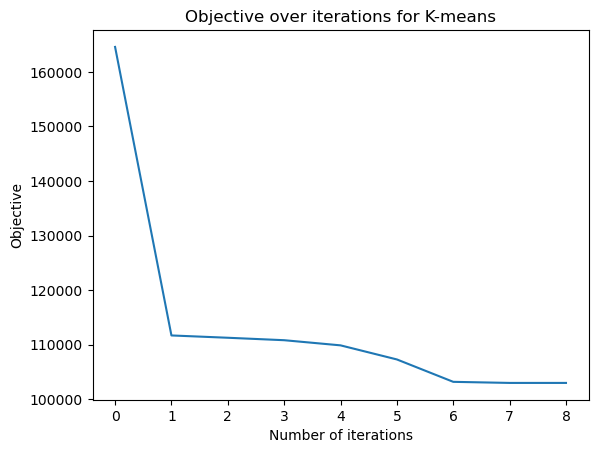

In [144]:
numRows = meanFileTrans.shape[0] # 3
numCols = meanFileTrans.shape[1] # 208

# random initialization 
def randInitialization(numRows, numCols):
    randomList = []
    for i in range(hipFile.shape[0]):
        randomList.append(np.random.choice(hipFile[i], size=3))
    return randomList

randList = np.array(randInitialization(numRows, numCols)).transpose() # must be 3 x 208
randObjList, genCluster =  kMeans(randList)
plotting(randObjList)

In [145]:
def arrangeExpression(geneCluster):
    sortExpression = []
    for cluster in range(clusters):
        for gene in range(len(geneCluster)): 
            if geneCluster[gene] == cluster:
                sortExpression.append(hipFileTrans[gene])
    return sortExpression

<Figure size 10000x10000 with 0 Axes>

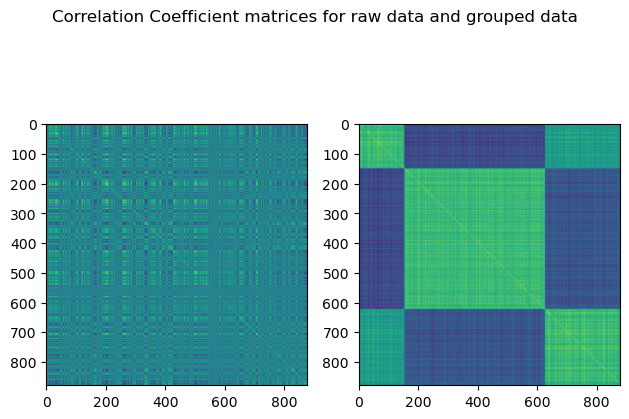

In [140]:
newExpression = arrangeExpression(genCluster)
finalCoefficient = []
coefficient1 = np.corrcoef(hipFileTrans)
coefficient2 = np.corrcoef(newExpression)
finalCoefficient.append(coefficient1)
finalCoefficient.append(coefficient2)

plt.figure(figsize = (100,100))
fig, axs = plt.subplots(1,2)
fig.suptitle('Correlation Coefficient matrices for raw data and grouped data')
for i in range(2):
    axs[i].imshow(finalCoefficient[i])

plt.tight_layout()
plt.show()


(c) With K = 3, try 10 random initializations. Show the correlation coefficient matrix as above and the corresponding objective at convergence for each initialization. Which of the 10 results would you choose for follow-up analysis?

In [136]:
# 10 random initializations
objectList_final = []
coefficientMatrices = []
for i in range(10):
    randList = np.array(randInitialization(numRows, numCols)).transpose()
    objectList, genCluster1 = kMeans(randList)
    objectList_final.append(objectList)
    expression = arrangeExpression(genCluster1)
    coefficientMatrix = np.corrcoef(expression)
    coefficientMatrices.append(coefficientMatrix)

In [194]:
for i in range(len(objectList_final)):
    print(objectList_final[i][-1])

109398.88893942193
109295.61686050917
109254.85560405465
103010.60123401816
109277.75755173987
109398.88893942189
103010.60123401815
109456.74919837361
109290.3943201838
103010.60123401815


<Figure size 20000x3000 with 0 Axes>

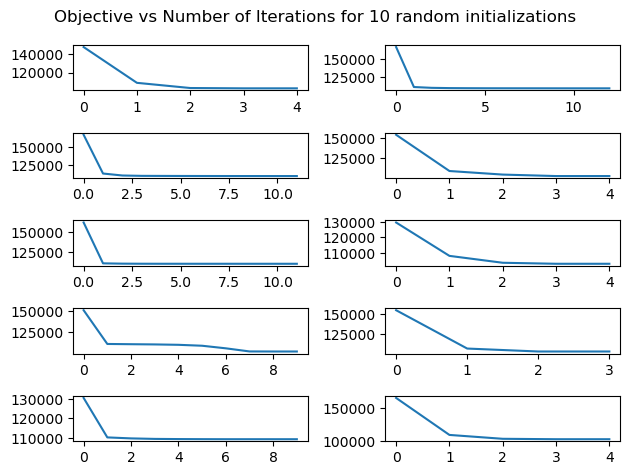

In [135]:
# 10 random initializations
# Objective functions
    
plt.figure(figsize = (200,30))
fig, axs = plt.subplots(5,2)
fig.suptitle('Objective vs Number of Iterations for 10 random initializations')
for i in range(10):
    axs[i//2, i%2].plot(list(range(len(objectList_final[i]))), objectList_final[i])

plt.tight_layout()
plt.show()

<Figure size 50000x20000 with 0 Axes>

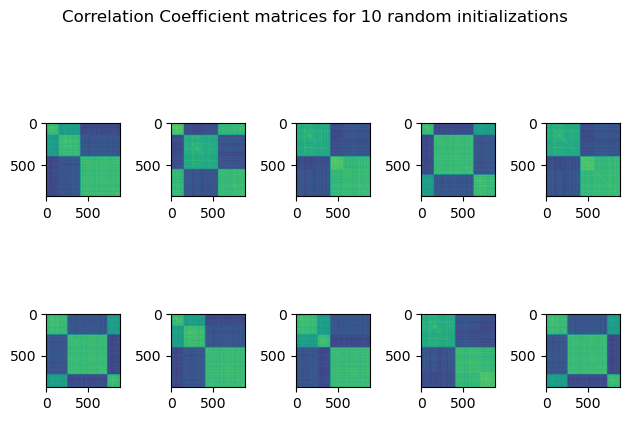

In [134]:
# 10 random initializations
# Coefficient matrices 

plt.figure(figsize = (500,200))
fig, axs = plt.subplots(2,5)
fig.suptitle('Correlation Coefficient matrices for 10 random initializations')
for i in range(10):
    axs[i//5, i%5].imshow(coefficientMatrices[i])

plt.tight_layout()
plt.show()

(d) Run K-means algorithm for K = 3, . . . , 12, with 10 random initializations for each K. Show the correlation coefficient matrix and objectives at convergence for different K, with your best choice of the 10 runs for each K. What do you think is the best K? Why?

In [181]:
# I think the K value that leads to an objective function with the sharpest drop over the iterations 
# is the best K because 

numOfRows = meanFileTrans.shape[0] # 3
numOfCols = meanFileTrans.shape[1] # 208

# changing k 
def manyInitializations(cols):
    minObjective = []
    geneClust = []
    for i in range(3, 13):
        randIni = np.array(randInitialization(i, cols)).transpose()
        objective = [] # list of lists
        clust = []     # list of lists 
        for j in range(1, 11):
            objectList, genCluster1 = kMeans(randIni)
            objective.append(objectList) # collecting all objective lists
            clust.append(genCluster1) 

        index = 0
        val = objective[0][-1]
        for i in range(len(objective)):
            if objective[i][-1] < val:
                index = i
                val = objective[i][-1]
        minObjective.append(objective[index])
        geneClust.append(clust[index])
    
    return minObjective, geneClust  


converginObjective, expList = manyInitializations(numOfCols)


finalExp = []
for i in expList:
    exp = arrangeExpression(i)
    coeff = np.corrcoef(exp)
    finalExp.append(coeff)

print('finished running')

<Figure size 20000x3000 with 0 Axes>

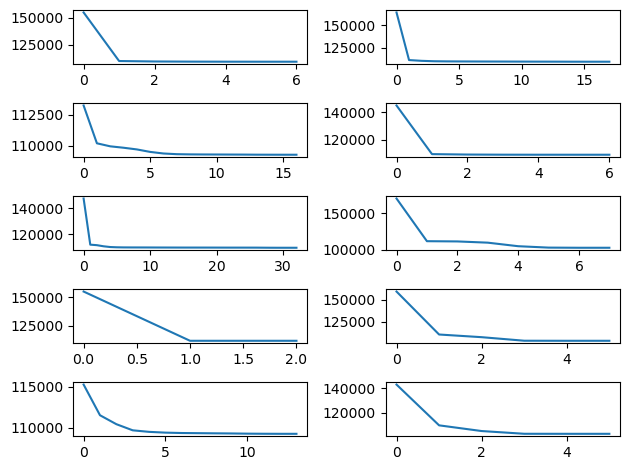

In [195]:
plt.figure(figsize = (200,30))
fig, axs = plt.subplots(5,2)

for i in range(10):
    axs[i//2, i%2].plot(list(range(len(converginObjective[i]))), converginObjective[i])

plt.tight_layout()
plt.show()

<Figure size 50000x50000 with 0 Axes>

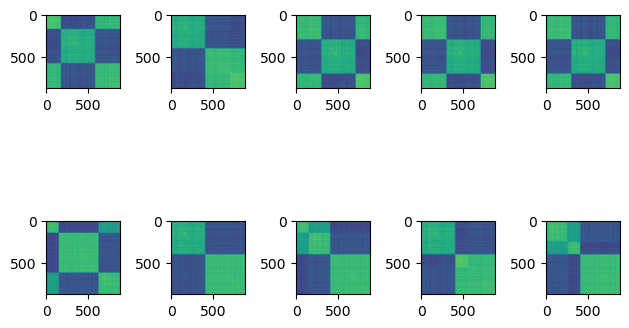

In [196]:
plt.figure(figsize = (500,500))
fig, axs = plt.subplots(2,5)

for i in range(10):
    axs[i//5, i%5].imshow(finalExp[i])

plt.tight_layout()
plt.show()